<a href="https://colab.research.google.com/github/nasirbashak/Plant-the-future/blob/master/Traffic_Data_Creation_using_1D_Perlin_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tf-nightly-2.0-preview
#!pip install tensorflow==2.1.0
!pip install noise


     |████████████████████████████████| 133kB 2.7MB/s 
  Created wheel for noise: filename=noise-1.2.2-cp36-cp36m-linux_x86_64.whl size=62468 sha256=76cf62c922177ac2cff02981f65654454b098172d7aded8c69e2eccd71646254
  Stored in directory: /root/.cache/pip/wheels/fd/a3/c1/d36defe6e9f074b25dc0f018eb9f8fdd675a7ef87071ce3821
Successfully built noise


### Importing Packages

In [0]:
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import noise
import pandas as pd

#print(tf.__version__)

### Helper function to plot data

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

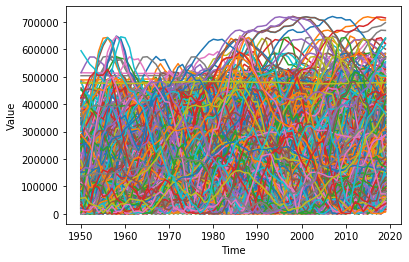

In [0]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 256
  span = 5.0
  octaves = 20
  base = 25
  slope = .005
  amplitude = 10000

  values = []
  n= 0


  while n != rows:
    if printLog:
      print("Row ",n+1)
    span = np.random.random_sample()*10

    time = []
    value = []

    for i in range(startYear,endYear+1):
      x = float(i) * span / points - 0.5 * span

      y = base + noise.pnoise1(x , octaves) * amplitude
      #print(x,y, end= '\n')
      time.append(int(i))
      value.append(int(np.abs(y)*100))
      base*=slope

    #print(len(value))
    if value[0] > value[-1]:
      if printLog:
        print("Rejected\n")
    else:
      if printLog:
        print("Accepted\n")
      n+=1
      if plotGraph:
        #plt.plot(time, value)
        plot_series(time,value)
        #print(time[0],time[-1])
        #print(value[0],value[-1])

      values.append(np.array(value))



  return np.array(values)

    
    #print(time)
    #print(value)

data = createData(1000,startYear=1950,endYear=2019,plotGraph=True,printLog=False)


In [0]:
data.shape

(1000, 70)

In [0]:
years = list(range(1950,2020))
years = list(map(str,years))
years[:20]

['1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969']

In [0]:
 d= pd.DataFrame(data,columns = years)
 d.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,150403,182655,208904,239936,259450,278091,299020,297100,286809,246121,205695,191284,176929,168412,150050,129941,96688,67916,56928,52585,58217,50858,59579,49217,28646,32376,52123,53698,55264,53876,52620,42978,33503,14361,41981,44583,41128,33388,37143,49098,62262,89940,129862,158811,193117,206279,195761,193889,197014,178351,177136,172524,175826,177172,187702,197876,188720,184930,176246,167307,184657,212086,249144,285684,299955,307400,281048,306884,285234,249815
1,76958,34511,10175,17840,3110,4809,22907,3940,28213,106054,188835,243715,265645,330122,410408,457375,457198,439433,380340,365049,359963,305433,282811,357516,411813,419873,462643,464720,332320,206955,104804,20150,159063,278800,377236,431964,408282,347630,357313,311203,269980,235530,259209,349292,409317,454281,503172,447574,346372,318914,300665,304878,264449,128261,52602,33358,45334,25578,34104,25991,61489,51700,55235,100951,78233,116064,181613,107099,124659,184114
2,31735,49601,35689,1721,36185,76196,90421,96130,67988,32638,4656,43026,52682,20355,5778,27165,76165,118544,145881,147872,161806,154259,149530,177686,196856,218599,243521,210525,157432,79936,5411,25700,34799,5572,60942,7184,31806,33101,16397,26848,4690,1941,62087,46397,2727,54982,66273,65864,881,62222,61557,28507,13990,19309,32462,23265,20430,4653,18021,7525,6288,17255,1213,535,38775,104211,86714,48103,398,41483
3,21750,1660,3071,1471,7587,9653,21953,15856,16401,14954,54558,90118,143887,137989,149867,158105,149317,151354,162720,177621,213969,252876,289905,272266,310265,313622,335361,352662,367286,396994,398262,409545,428093,446762,469919,468878,518675,545625,534823,508839,499924,490188,477452,452229,426874,384093,327397,285222,256686,229930,182209,131581,121284,134772,133356,123365,130122,111925,102477,80822,44795,22914,12666,10953,51031,67753,97752,113275,149623,137284
4,115679,138678,179910,282093,364453,379865,376419,382417,353360,326951,300109,241991,227385,136653,115719,38861,4173,9202,334,19166,75399,125420,129184,111092,44933,19474,99334,138748,160886,193011,138202,79669,44427,14639,14044,34016,5421,24103,45724,12400,36931,41936,8359,79861,102983,77201,97860,49274,76773,127261,130839,132539,140077,109508,40169,152676,183945,170523,155457,114129,68549,27033,30036,71258,131684,174191,232516,275704,326658,376725


In [0]:
d.to_csv("TrafficDensity1950to2019.csv")

In [0]:
d.describe()


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,93816.827000,97444.770000,101803.490000,107464.027000,113701.402000,119658.943000,124090.359000,127898.429000,130136.104000,131404.570000,132375.171000,133877.293000,134629.539000,136844.961000,139500.651000,142591.000000,145393.297000,146558.591000,148195.397000,149436.296000,151069.708000,151290.655000,151573.081000,150678.633000,150742.468000,150720.432000,152826.092000,152828.573000,150449.845000,149549.360000,149378.713000,149890.9890,151130.981000,154287.147000,157716.678000,160108.616000,163677.436000,167257.773000,170533.831000,170566.499000,170319.082000,169663.08000,168786.217000,169122.76600,170008.56900,171701.606000,173057.913000,172894.387000,173112.059000,173248.208000,173363.069000,173406.691000,173244.782000,173754.329000,175324.75400,177885.798000,180160.22000,183345.927000,185736.780000,187601.653000,189761.109000,193678.061000,197460.606000,200082.29800,204159.60000,208803.460000,212369.374000,217430.00400,223319.472000,226963.796000
std,102142.004021,102388.957204,106351.130359,111135.752941,115525.900353,120188.753441,124175.305922,127259.796744,127209.477907,126762.392856,127112.719575,125878.903357,126652.191474,126312.344799,126697.060397,127616.882965,128612.731427,129464.573098,129327.196085,129173.618647,127851.196246,126828.309326,128001.505959,128725.353895,129343.638102,132301.378934,134745.570103,135308.286843,134991.247453,134900.337887,136350.451368,137859.2556,140815.249594,142826.442675,145830.003315,148485.004426,150052.164146,150137.035623,150668.245857,149875.450363,148190.607553,146461.19241,146585.030045,146517.59074,147520.48765,148009.881983,149132.959176,150862.207687,151290.407185,150263.510163,149745.135536,148572.722707,149500.071572,150441.597637,152205.66386,153614.089685,153743.46359,154393.906033,155358.485486,155741.386354,155400.529583,154315.305312,152813.769813,151852.98705,150360.37927,149018.786954,148343.949678,147446.11074,146173.615799,143733.395338
min,190.000000,68.000000,111.000000,437.000000,315.000000,77.000000,26.000000,20.000000,99.000000,96.000000,70.000000,69.000000,390.000000,38.000000,275.000000,177.000000,101.000000,78.000000,159.000000,213.000000,169.000000,320.000000,5.000000,25.000000,343.000000,283.000000,311.000000,53.000000,36.000000,385.000000,40.000000,18.0000,190.000000,124.000000,49.000000,0.000000,71.000000,385.000000,422.000000,223.000000,160.000000,59.00000,21.000000,48.00000,287.00000,159.000000,198.000000,289.000000,66.000000,500.000000,30.000000,39.000000,62.000000,263.000000,77.00000,25.000000,79.00000,163.000000,3.000000,65.000000,124.000000,1261.000000,452.000000,293.00000,283.00000,359.000000,288.000000,698.00000,353.000000,7711.000000
25%,23206.500000,25967.250000,27526.500000,27961.750000,27386.000000,30708.000000,32545.000000,31549.750000,35102.500000,34847.250000,

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
1950    1000 non-null int64
1951    1000 non-null int64
1952    1000 non-null int64
1953    1000 non-null int64
1954    1000 non-null int64
1955    1000 non-null int64
1956    1000 non-null int64
1957    1000 non-null int64
1958    1000 non-null int64
1959    1000 non-null int64
1960    1000 non-null int64
1961    1000 non-null int64
1962    1000 non-null int64
1963    1000 non-null int64
1964    1000 non-null int64
1965    1000 non-null int64
1966    1000 non-null int64
1967    1000 non-null int64
1968    1000 non-null int64
1969    1000 non-null int64
1970    1000 non-null int64
1971    1000 non-null int64
1972    1000 non-null int64
1973    1000 non-null int64
1974    1000 non-null int64
1975    1000 non-null int64
1976    1000 non-null int64
1977    1000 non-null int64
1978    1000 non-null int64
1979    1000 non-null int64
1980    1000 non-null int64
1981    1000 non-null int6

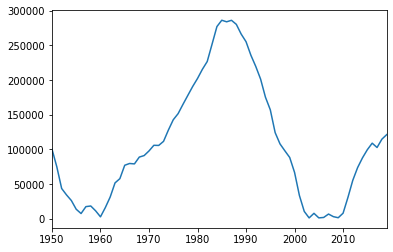

In [0]:
#Plotting random row
d.iloc[100].plot()

In [0]:
df = pd.concat([df,d], sort=False)

In [0]:
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Area,City,Country,If 2020> capacity,Latitude,Longitude,existing road/flyover capacity,existing road/flyover construction year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000.0,Yelahanka,Bengaluru,India,Yes,12.97194,77.59369,80000.0,2015.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120000.0,Hebbala,Bengaluru,India,No,12.97194,77.59369,150000.0,2018.0
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294036.0,290001.0,301151.0,273888.0,256100.0,295592.0,318038.0,316093.0,318313.0,320637.0,329207.0,320229.0,245803.0,208867.0,106914.0,35072.0,72876.0,159768.0,237807.0,321077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33797.0,34759.0,36360.0,38856.0,40906.0,43035.0,43650.0,46466.0,47951.0,50191.0,51501.0,53614.0,53159.0,53837.0,54148.0,55447.0,55541.0,56235.0,56693.0,58672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.to_csv("SampleTrafficData.csv")

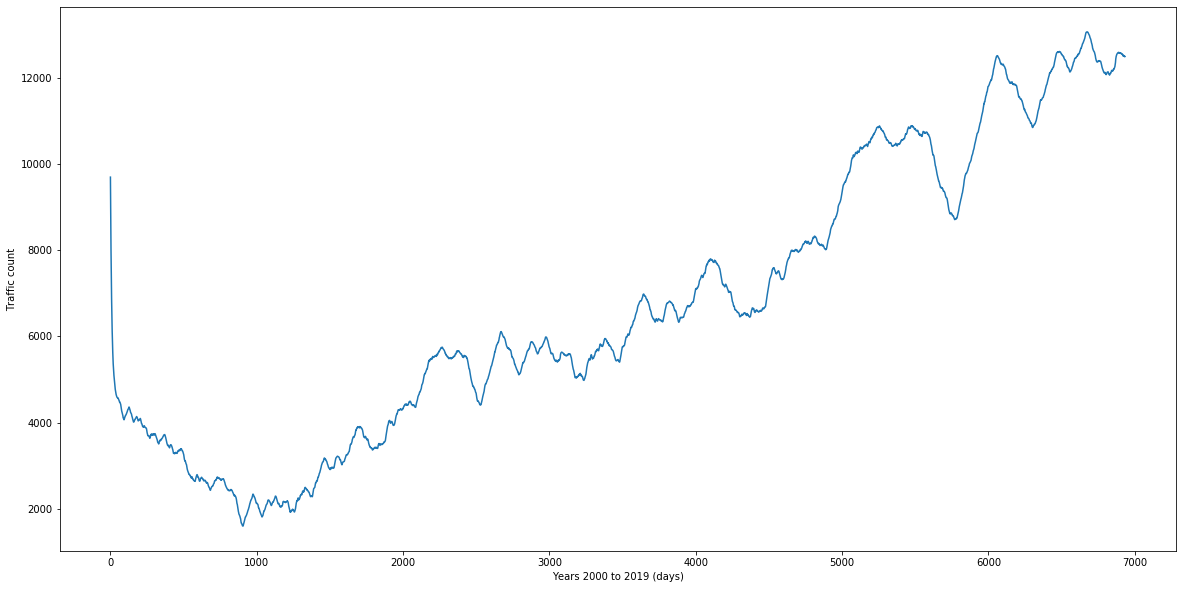

In [0]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 2560
  span = 5.0
  octaves = 20
  base = 5000
  slope = .9
  amplitude = 10000

  values = []
  n= 0


 
  span = np.random.random_sample()*10

  time = []
  value = []

  #years = [x for x in range((endYear-startYear)*365)]


  for i in range((endYear-startYear)*365):
    #for j in range(365):
    x = float(startYear+i) * span / points - 0.5 * span

    y = base + noise.pnoise1(x , octaves) * amplitude
    #print(x,y, end= '\n')
    
    time.append(n)
    n+=1
    #span*=1.2
    base*=slope
    y = y + (i*2*slope)
    value.append(int(y))


    #base*=slope
  plt.figure(figsize=(20,10))
  plt.plot(time,value)
  plt.xlabel("Years 2000 to 2019 (days)")
  plt.ylabel("Traffic count")

  minValue = min(value)
  value = np.array(value)+np.abs(minValue) + np.random.randint(50)

 

  return  np.array(value), np.array(time)



data ,time = createData(1000,startYear=2000,endYear=2019,plotGraph=True,printLog=True)


Text(0, 0.5, 'Traffic count')

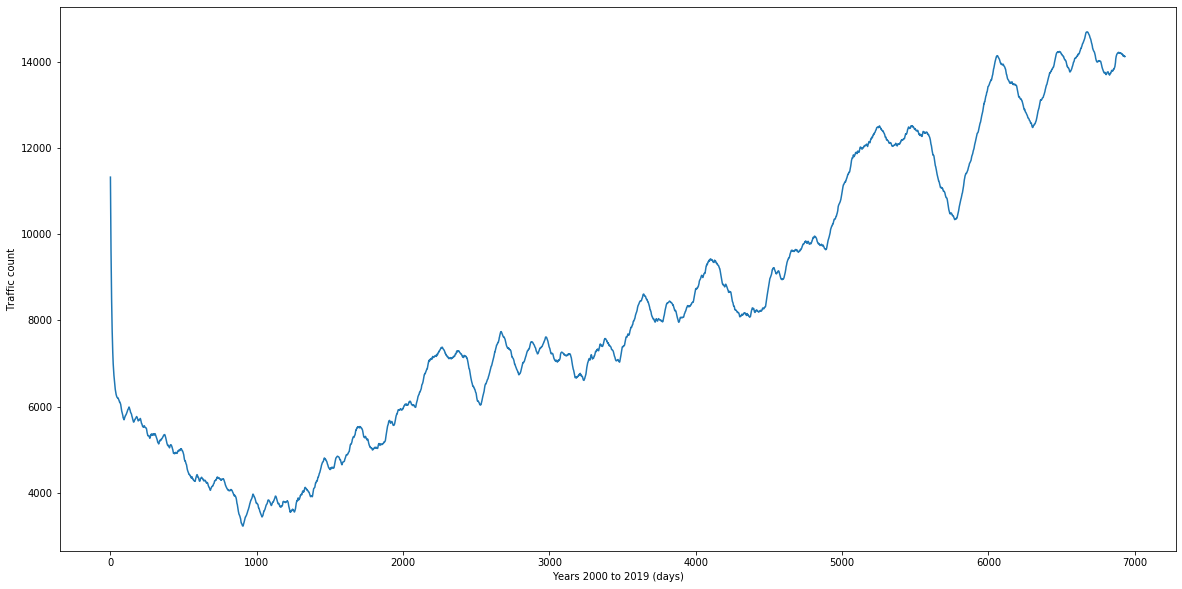

In [0]:
plt.figure(figsize=(20,10))
plt.plot(time,data)
plt.xlabel("Years 2000 to 2019 (days)")
plt.ylabel("Traffic count")

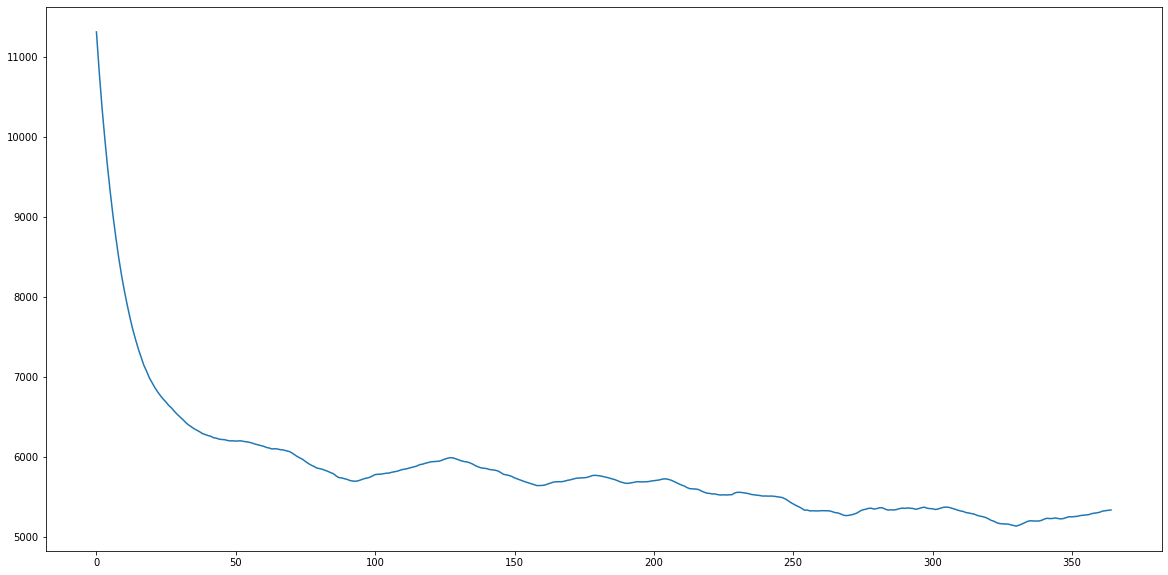

In [0]:
plt.figure(figsize=(20,10))
plt.plot(time[:365],data[:365])

In [0]:
min(data)

3227

In [0]:
max(data)

14688

Total Days =  9497


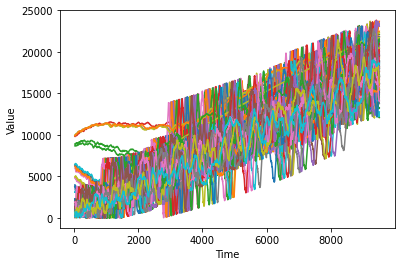

In [7]:
def isLeap(year):
  return ((year%4 ==0 and year%100 !=0) or (year%400 == 0))






def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 2560
  span = 5.0
  octaves = 20
  base = 5000
  slope = .9
  amplitude = 10000

  values = []
  n= 0

  totalDays = 0
  startAdjust = 20

  for year in range(startYear,endYear+1):
    if isLeap(year):
      totalDays+=366
    else:
      totalDays+=365

  print("Total Days = ",totalDays)
  totalDays+=startAdjust

  


  while n != rows:
 
    span = np.random.random_sample()*10

    time = []
    value = []

    for i in range(totalDays):
      x = float(startYear+i) * span / points - 0.5 * span

      y = base + noise.pnoise1(x , octaves) * amplitude
      
      time.append(i)
      base*=slope
      y = y + (i*2*slope)
      value.append(int(y))


    minValue = min(value)
    value = np.array(value)+np.abs(minValue) + np.random.randint(50)
    value = np.array(value[startAdjust:])
    time = np.array(time[startAdjust:])

    n+=1

    if plotGraph:
      #plt.figure(figsize=(20,10))
      plot_series(time,value)
      #plt.xlabel("Years 2000 to 2019 (days)")
      #plt.ylabel("Traffic count")
    values.append(value)

    



 

  return  np.array(values), np.array(time)



data ,time = createData(100,startYear=2000,endYear=2025,plotGraph=True,printLog=True)


In [8]:
print(data.shape)
print(time.shape)

(100, 9497)
(9497,)


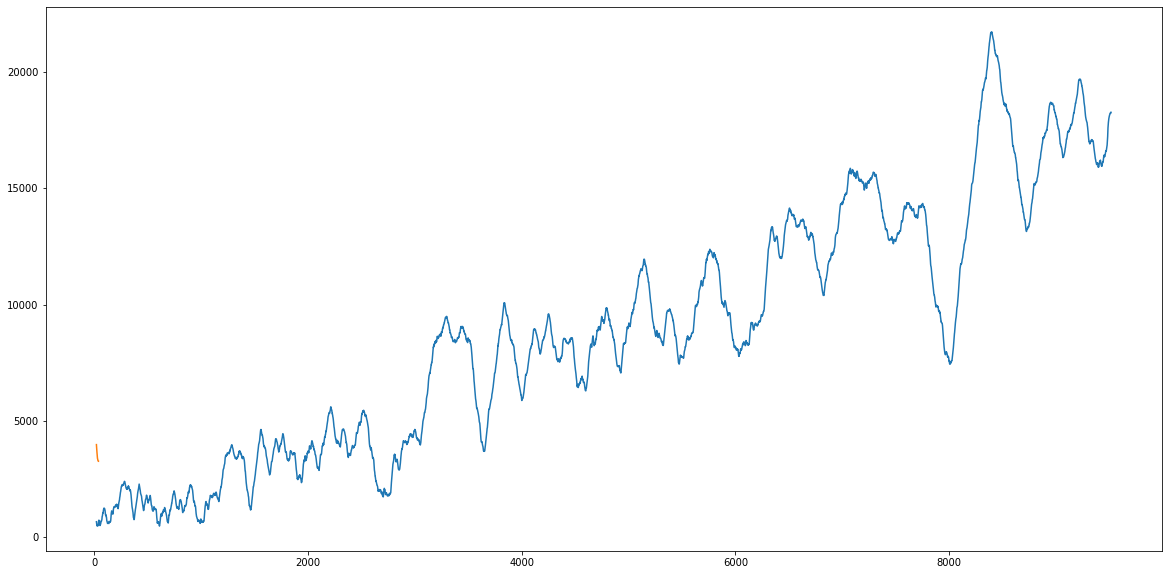

In [9]:
plt.figure(figsize=(20,10))
plt.plot(time,data[9])
plt.plot(time[:20],data[0][:20])

In [10]:
data[0][9496]

16148

In [12]:
columns = []

for year in range(2000,2025+1):
  if isLeap(year):
    for day in range(1,367):
      clm = str(year) +'-'+ str(day)
      columns.append(clm)
  else:
    for day in range(1,366):
      clm = str(year) +'-'+ str(day)
      columns.append(clm)

print(columns)



['2000-1', '2000-2', '2000-3', '2000-4', '2000-5', '2000-6', '2000-7', '2000-8', '2000-9', '2000-10', '2000-11', '2000-12', '2000-13', '2000-14', '2000-15', '2000-16', '2000-17', '2000-18', '2000-19', '2000-20', '2000-21', '2000-22', '2000-23', '2000-24', '2000-25', '2000-26', '2000-27', '2000-28', '2000-29', '2000-30', '2000-31', '2000-32', '2000-33', '2000-34', '2000-35', '2000-36', '2000-37', '2000-38', '2000-39', '2000-40', '2000-41', '2000-42', '2000-43', '2000-44', '2000-45', '2000-46', '2000-47', '2000-48', '2000-49', '2000-50', '2000-51', '2000-52', '2000-53', '2000-54', '2000-55', '2000-56', '2000-57', '2000-58', '2000-59', '2000-60', '2000-61', '2000-62', '2000-63', '2000-64', '2000-65', '2000-66', '2000-67', '2000-68', '2000-69', '2000-70', '2000-71', '2000-72', '2000-73', '2000-74', '2000-75', '2000-76', '2000-77', '2000-78', '2000-79', '2000-80', '2000-81', '2000-82', '2000-83', '2000-84', '2000-85', '2000-86', '2000-87', '2000-88', '2000-89', '2000-90', '2000-91', '2000-9

In [13]:
len(columns)

9497

In [14]:
df = pd.DataFrame(data,columns=columns)
df.head()

,2000-1,2000-2,2000-3,2000-4,2000-5,2000-6,2000-7,2000-8,2000-9,2000-10,2000-11,2000-12,2000-13,2000-14,2000-15,2000-16,2000-17,2000-18,2000-19,2000-20,2000-21,2000-22,2000-23,2000-24,2000-25,2000-26,2000-27,2000-28,2000-29,2000-30,2000-31,2000-32,2000-33,2000-34,2000-35,2000-36,2000-37,2000-38,2000-39,2000-40,...,2025-326,2025-327,2025-328,2025-329,2025-330,2025-331,2025-332,2025-333,2025-334,2025-335,2025-336,2025-337,2025-338,2025-339,2025-340,2025-341,2025-342,2025-343,2025-344,2025-345,2025-346,2025-347,2025-348,2025-349,2025-350,2025-351,2025-352,2025-353,2025-354,2025-355,2025-356,2025-357,2025-358,2025-359,2025-360,2025-361,2025-362,2025-363,2025-364,2025-365
0,3986,3912,3846,3780,3719,3652,3599,3550,3486,3435,3390,3372,3358,3332,3309,3288,3284,3278,3271,3270,3263,3241,3229,3219,3211,3208,3199,3215,3230,3241,3228,3224,3226,3243,3243,3249,3238,3225,3232,3226,...,15852,15866,15896,15903,15907,15915,15929,15936,15919,15905,15899,15907,15922,15929,15927,15936,15969,16001,16012,16027,16031,16054,16066,16074,16088,16090,16115,16116,16112,16105,16098,16093,16075,16073,16070,16084,16113,16117,16140,16148
1,1617,1616,1639,1620,1591,1562,1521,1462,1372,1358,1279,1172,1084,1058,1127,1140,1135,1128,1121,1194,1237,1285,1331,1343,1305,1314,1335,1365,1371,1391,1509,1614,1654,1661,1667,1725,1813,1846,1905,1863,...,17997,18070,18098,18186,18200,18150,18113,18036,18020,18011,17938,17891,17848,17810,17814,17898,17980,18048,18145,18208,18308,18353,18351,18331,18313,18393,18456,18532,18615,18688,18657,18622,18623,18616,18614,18648,18709,18836,18882,18901
2,8890,8888,8886,8880,8877,8872,8870,8867,8864,8861,8858,8863,8868,8876,8887,8898,8904,8909,8914,8923,8931,8940,8949,8954,8959,8963,8973,8984,8989,8990,8991,8989,8988,8985,8983,8976,8975,8971,8975,8983,...,22132,22134,22142,22146,22149,22150,22150,22156,22166,22176,22179,22181,22182,22182,22180,22174,22173,22163,22157,22159,22159,22156,22154,22154,22154,22149,22141,22136,22130,22126,22130,22128,22122,22123,22121,22119,22111,22109,22112,22110
3,1201,1209,1278,1399,1524,1597,1622,1695,1763,1752,1739,1724,1744,1714,1713,1654,1673,1700,1718,1770,1790,1818,1828,1785,1802,1757,1737,1723,1778,1843,1848,1843,1801,1702,1650,1611,1590,1594,1550,1526,...,21046,20978,20935,20983,21075,21130,21091,21092,21108,21101,21137,21146,21176,21109,21126,21142,21083,21057,20996,20870,20790,20664,20527,20414,20414,20396,20263,20087,19971,19888,19756,19622,19523,19407,19293,19245,19122,19027,18942,18934
4,1522,1431,1383,1350,1290,1280,1327,1272,1298,1294,1262,1243,1233,1202,1247,1327,1437,1514,1571,1584,1587,1598,1574,1548,1518,1478,1418,1336,1320,1243,1138,1054,1021,1083,1109,1099,1094,1085,1152,1194,...,20519,20585,20592,20619,20619,20607,20630,20654,20677,20711,20705,20706,20639,20696,20726,20690,20737,20749,20740,20708,20735,20763,20735,20781,20819,20781,20793,20788,20823,20833,20778,20734,20723,20763,20751,20763,20765,20738,20787,20830


In [15]:
df.describe()

,2000-1,2000-2,2000-3,2000-4,2000-5,2000-6,2000-7,2000-8,2000-9,2000-10,2000-11,2000-12,2000-13,2000-14,2000-15,2000-16,2000-17,2000-18,2000-19,2000-20,2000-21,2000-22,2000-23,2000-24,2000-25,2000-26,2000-27,2000-28,2000-29,2000-30,2000-31,2000-32,2000-33,2000-34,2000-35,2000-36,2000-37,2000-38,2000-39,2000-40,...,2025-326,2025-327,2025-328,2025-329,2025-330,2025-331,2025-332,2025-333,2025-334,2025-335,2025-336,2025-337,2025-338,2025-339,2025-340,2025-341,2025-342,2025-343,2025-344,2025-345,2025-346,2025-347,2025-348,2025-349,2025-350,2025-351,2025-352,2025-353,2025-354,2025-355,2025-356,2025-357,2025-358,2025-359,2025-360,2025-361,2025-362,2025-363,2025-364,2025-365
count,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2126.530000,2124.52000,2124.08000,2122.890000,2120.280000,2114.000000,2109.290000,2099.980000,2095.290000,2091.850000,2085.210000,2085.700000,2084.550000,2085.840000,2086.940000,2090.530000,2097.590000,2104.260000,2106.260000,2106.950000,2112.460000,2114.510000,2116.780000,2110.840000,2108.390000,2108.94000,2110.690000,2107.200000,2106.190000,2104.150000,2106.420,2106.300000,2106.120000,2109.490000,2111.010000,2109.220000,2106.480000,2106.260000,2107.17000,2105.180000,...,18167.330000,18165.170000,18161.950000,18162.010000,18157.22000,18157.840000,18156.220000,18157.640000,18162.980000,18164.860000,18165.270000,18162.400000,18161.130000,18162.540000,18164.000000,18163.750000,18166.260000,18162.720000,18162.16000,18161.930000,18160.560000,18158.200000,18157.380000,18153.880000,18159.80000,18165.060000,18165.710000,18161.850000,18161.310000,18164.250000,18161.240000,18154.030000,18151.73000,18148.950000,18145.790000,18144.500000,18144.290000,18142.840000,18142.890000,18141.250000
std,2338.460304,2339.49845,2339.53427,2340.147759,2341.153756,2343.342028,2345.291295,2348.257394,2350.629064,2350.513889,2351.542744,2351.069241,2351.137788,2350.805324,2350.210052,2348.048343,2344.657181,2341.358923,2339.111852,2338.039304,2335.399909,2333.290729,2333.468172,2335.087391,2335.845232,2335.59329,2335.287427,2336.999211,2337.222956,2337.651802,2337.329,2336.924088,2336.748286,2335.344188,2334.882709,2335.072553,2334.605201,2333.583569,2333.24128,2333.485391,...,2347.523217,2347.514082,2347.410163,2347.791571,2347.64231,2348.458238,2349.134681,2348.548494,2345.272731,2340.519247,2335.462426,2329.770054,2329.292881,2330.381589,2333.741479,2337.952693,2340.669323,2342.239307,2343.99216,2342.692478,2343.570324,2344.177955,2346.318133,2354.307332,2358.90734,2363.152708,2369.357916,2374.155116,2374.286826,2371.908661,2366.447711,2362.531515,2358.60477,2357.038788,2355.138921,2356.085276,2354.604345,2352.515287,2352.226076,2347.947263
min,31.000000,35.00000,58.00000,90.000000,113.000000,135.000000,163.000000,189.000000,220.000000,213.000000,223.000000,237.000000,231.000000,235.000000,185.000000,157.000000,150.000000,128.000000,103.000000,89.000000,83.000000,99.000000,128.000000,156.000000,179.000000,202.00000,243.000000,268.000000,261.000000,258.000000,261.000,210.000000,161.000000,132.000000,94.000000,52.000000,57.000000,56.000000,61.00000,66.000000,...,12632.000000,12586.000000,12530.000000,12516.000000,12467.0000

In [16]:
df[["2000-1","2019-365"]]

,2000-1,2019-365
0,3986,16431
1,1617,13983
2,8890,16593
3,1201,17121
4,1522,14582
...,...,...
95,1363,16210
96,1879,9760
97,323,12239
98,484,12363


In [17]:
df[["2020-1","2025-365"]]

,2020-1,2025-365
0,16446,16148
1,14079,18901
2,16601,22110
3,17068,18934
4,14564,20830
...,...,...
95,16240,17536
96,9749,14066
97,12206,17006
98,12349,16264


In [0]:
df.to_csv("Traffic_density_day_by_day_2000_to_2025.csv")

In [19]:
print(data.shape)
print(data.T.shape)


(100, 9497)
(9497, 100)


In [20]:
df2 = pd.DataFrame(data.T)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,3986,1617,8890,1201,1522,6422,1547,910,2094,670,6298,1738,402,766,1226,503,2298,804,1171,3123,1719,1889,928,1409,1823,677,4832,496,971,6445,2037,324,1138,511,1362,3759,683,326,474,1046,...,1743,1562,723,1596,1724,1622,1870,9942,9950,1605,1140,9915,8679,745,545,31,1773,1634,1681,796,2285,1622,1856,1629,616,1951,5999,166,4939,235,1046,6217,564,1585,1559,1363,1879,323,484,696
1,3912,1616,8888,1209,1431,6427,1651,929,2083,624,6301,1723,370,779,1275,518,2327,780,1141,3135,1720,1959,932,1503,1810,627,4832,429,1042,6449,2047,288,1087,493,1298,3755,716,316,453,1011,...,1759,1620,719,1540,1619,1614,1857,9946,9954,1584,1152,9919,8687,757,568,35,1813,1574,1684,767,2279,1637,1806,1537,614,1967,5998,215,4938,210,1065,6204,549,1539,1630,1255,1906,308,474,642
2,3846,1639,8886,1278,1383,6429,1727,971,2042,603,6302,1710,336,761,1314,504,2302,727,1128,3131,1732,2024,922,1598,1782,601,4831,380,1036,6457,2176,289,1042,524,1278,3761,772,326,438,1008,...,1775,1653,681,1594,1564,1577,1845,9949,9963,1533,1140,9918,8696,766,595,58,1797,1498,1686,718,2275,1639,1732,1465,580,1970,5993,221,4943,190,1179,6193,550,1454,1645,1182,1920,299,503,618
3,3780,1620,8880,1399,1350,6432,1717,1005,1983,555,6295,1716,333,784,1384,514,2275,684,1102,3123,1755,2067,906,1630,1785,693,4836,337,1067,6471,2220,302,998,520,1336,3773,838,331,402,1030,...,1833,1729,654,1538,1463,1562,1801,9952,9976,1440,1110,9923,8699,765,627,90,1784,1412,1689,695,2263,1636,1656,1403,544,1971,5985,229,4959,169,1202,6184,566,1408,1649,1121,1966,311,549,557
4,3719,1591,8877,1524,1290,6449,1736,999,1952,536,6292,1724,333,786,1406,530,2234,714,1104,3116,1858,2052,890,1636,1791,796,4841,302,1052,6472,2263,291,960,508,1285,3775,885,330,387,1023,...,1913,1790,669,1451,1406,1541,1791,9957,9986,1395,1063,9923,8703,708,611,113,1777,1361,1692,693,2261,1646,1575,1306,543,1985,5974,260,4969,144,1191,6174,574,1366,1662,1173,1952,311,609,513


In [0]:
df2.index = columns

In [22]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2000-1,3986,1617,8890,1201,1522,6422,1547,910,2094,670,6298,1738,402,766,1226,503,2298,804,1171,3123,1719,1889,928,1409,1823,677,4832,496,971,6445,2037,324,1138,511,1362,3759,683,326,474,1046,...,1743,1562,723,1596,1724,1622,1870,9942,9950,1605,1140,9915,8679,745,545,31,1773,1634,1681,796,2285,1622,1856,1629,616,1951,5999,166,4939,235,1046,6217,564,1585,1559,1363,1879,323,484,696
2000-2,3912,1616,8888,1209,1431,6427,1651,929,2083,624,6301,1723,370,779,1275,518,2327,780,1141,3135,1720,1959,932,1503,1810,627,4832,429,1042,6449,2047,288,1087,493,1298,3755,716,316,453,1011,...,1759,1620,719,1540,1619,1614,1857,9946,9954,1584,1152,9919,8687,757,568,35,1813,1574,1684,767,2279,1637,1806,1537,614,1967,5998,215,4938,210,1065,6204,549,1539,1630,1255,1906,308,474,642
2000-3,3846,1639,8886,1278,1383,6429,1727,971,2042,603,6302,1710,336,761,1314,504,2302,727,1128,3131,1732,2024,922,1598,1782,601,4831,380,1036,6457,2176,289,1042,524,1278,3761,772,326,438,1008,...,1775,1653,681,1594,1564,1577,1845,9949,9963,1533,1140,9918,8696,766,595,58,1797,1498,1686,718,2275,1639,1732,1465,580,1970,5993,221,4943,190,1179,6193,550,1454,1645,1182,1920,299,503,618
2000-4,3780,1620,8880,1399,1350,6432,1717,1005,1983,555,6295,1716,333,784,1384,514,2275,684,1102,3123,1755,2067,906,1630,1785,693,4836,337,1067,6471,2220,302,998,520,1336,3773,838,331,402,1030,...,1833,1729,654,1538,1463,1562,1801,9952,9976,1440,1110,9923,8699,765,627,90,1784,1412,1689,695,2263,1636,1656,1403,544,1971,5985,229,4959,169,1202,6184,566,1408,1649,1121,1966,311,549,557
2000-5,3719,1591,8877,1524,1290,6449,1736,999,1952,536,6292,1724,333,786,1406,530,2234,714,1104,3116,1858,2052,890,1636,1791,796,4841,302,1052,6472,2263,291,960,508,1285,3775,885,330,387,1023,...,1913,1790,669,1451,1406,1541,1791,9957,9986,1395,1063,9923,8703,708,611,113,1777,1361,1692,693,2261,1646,1575,1306,543,1985,5974,260,4969,144,1191,6174,574,1366,1662,1173,1952,311,609,513


In [23]:
df2.columns

RangeIndex(start=0, stop=100, step=1)

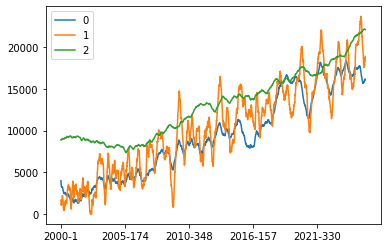

In [24]:
df2[[0,1,2]].plot()

In [28]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2000-1,3986,1617,8890,1201,1522,6422,1547,910,2094,670,6298,1738,402,766,1226,503,2298,804,1171,3123,1719,1889,928,1409,1823,677,4832,496,971,6445,2037,324,1138,511,1362,3759,683,326,474,1046,...,1743,1562,723,1596,1724,1622,1870,9942,9950,1605,1140,9915,8679,745,545,31,1773,1634,1681,796,2285,1622,1856,1629,616,1951,5999,166,4939,235,1046,6217,564,1585,1559,1363,1879,323,484,696
2000-2,3912,1616,8888,1209,1431,6427,1651,929,2083,624,6301,1723,370,779,1275,518,2327,780,1141,3135,1720,1959,932,1503,1810,627,4832,429,1042,6449,2047,288,1087,493,1298,3755,716,316,453,1011,...,1759,1620,719,1540,1619,1614,1857,9946,9954,1584,1152,9919,8687,757,568,35,1813,1574,1684,767,2279,1637,1806,1537,614,1967,5998,215,4938,210,1065,6204,549,1539,1630,1255,1906,308,474,642
2000-3,3846,1639,8886,1278,1383,6429,1727,971,2042,603,6302,1710,336,761,1314,504,2302,727,1128,3131,1732,2024,922,1598,1782,601,4831,380,1036,6457,2176,289,1042,524,1278,3761,772,326,438,1008,...,1775,1653,681,1594,1564,1577,1845,9949,9963,1533,1140,9918,8696,766,595,58,1797,1498,1686,718,2275,1639,1732,1465,580,1970,5993,221,4943,190,1179,6193,550,1454,1645,1182,1920,299,503,618
2000-4,3780,1620,8880,1399,1350,6432,1717,1005,1983,555,6295,1716,333,784,1384,514,2275,684,1102,3123,1755,2067,906,1630,1785,693,4836,337,1067,6471,2220,302,998,520,1336,3773,838,331,402,1030,...,1833,1729,654,1538,1463,1562,1801,9952,9976,1440,1110,9923,8699,765,627,90,1784,1412,1689,695,2263,1636,1656,1403,544,1971,5985,229,4959,169,1202,6184,566,1408,1649,1121,1966,311,549,557
2000-5,3719,1591,8877,1524,1290,6449,1736,999,1952,536,6292,1724,333,786,1406,530,2234,714,1104,3116,1858,2052,890,1636,1791,796,4841,302,1052,6472,2263,291,960,508,1285,3775,885,330,387,1023,...,1913,1790,669,1451,1406,1541,1791,9957,9986,1395,1063,9923,8703,708,611,113,1777,1361,1692,693,2261,1646,1575,1306,543,1985,5974,260,4969,144,1191,6174,574,1366,1662,1173,1952,311,609,513


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 2000-1 to 2025-365
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9497 non-null   int64
 1   1       9497 non-null   int64
 2   2       9497 non-null   int64
 3   3       9497 non-null   int64
 4   4       9497 non-null   int64
 5   5       9497 non-null   int64
 6   6       9497 non-null   int64
 7   7       9497 non-null   int64
 8   8       9497 non-null   int64
 9   9       9497 non-null   int64
 10  10      9497 non-null   int64
 11  11      9497 non-null   int64
 12  12      9497 non-null   int64
 13  13      9497 non-null   int64
 14  14      9497 non-null   int64
 15  15      9497 non-null   int64
 16  16      9497 non-null   int64
 17  17      9497 non-null   int64
 18  18      9497 non-null   int64
 19  19      9497 non-null   int64
 20  20      9497 non-null   int64
 21  21      9497 non-null   int64
 22  22      9497 non-null   int64
 23  23      

In [0]:
df2.to_csv("/content/drive/My Drive/Google Earth/new datasets/Traffic_density_day_by_day_2000_to_2025_version2.csv")

In [30]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.00000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,...,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.00000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,9282.395493,10222.899653,13026.570391,10688.112035,10092.403075,10578.123934,10359.575234,8765.993156,9303.790039,8805.615352,10365.197220,8801.079078,8760.915868,10575.287249,10338.127303,8631.696536,10462.646731,10592.655049,9603.390018,9220.550806,10360.821944,9265.602927,8553.914815,10234.417290,10749.073813,9955.118985,9832.621986,8469.790250,9884.603138,10681.147731,10431.414341,8663.315573,9314.150995,8828.373381,10113.63062,9430.166052,8766.674950,8708.674634,8809.745393,9570.712751,...,10384.527535,10708.570812,10580.560493,10476.737707,10086.057597,9286.695693,10801.01590,14802.644203,14789.022007,9337.502053,8797.757924,14821.111614,12786.753606,10563.592503,8621.804149,8519.997052,9092.948194,9594.495525,12458.996631,8783.927661,9021.156576,8798.141834,10066.366642,9108.658524,8492.601453,8922.164578,10143.766874,8756.923555,9842.247341,8754.444246,9578.187533,10309.064968,9709.788565,10278.840160,10245.644203,10298.280088,9079.743919,8688.990523,8820.987891,8542.161314
std,5022.374793,5446.219155,4004.060399,5429.069321,5345.609592,4505.260817,5448.409495,5349.520928,5367.342611,5309.944546,4380.823797,4942.506479,5077.065740,5415.834675,5463.806224,5203.391251,5447.274813,5412.473430,5300.395794,4987.461229,5444.477344,5359.082323,5184.155765,5452.881914,5415.684336,5394.964082,4923.696194,5140.278785,5431.464622,4527.054740,5450.724081,5391.389640,5360.048654,5317.009842,5360.15061,5035.184370,5380.249188,5391.124271,5164.342724,5351.501675,...,5442.009829,5418.297059,5383.054933,5412.775755,5333.105453,5364.453717,5421.11554,3775.035312,3775.001586,5368.100807,5271.172345,3761.730425,4153.638681,5417.780434,5325.723481,4988.996656,5327.565035,5426.931481,5913.689142,5398.530941,5011.228990,5002.816894,5325.943722,5317.299112,5133.759325,4999.306644,4276.213273,5274.784580,4714.914512,5192.511981,5321.774237,4336.259578,5339.595028,5450.152121,5448.897585,5434.622602,5371.123192,5392.046453,5324.152354,4989.102670
min,1195.000000,1.000000,7355.000000,3.000000,12.000000,3383.000000,9.000000,33.000000,46.000000,482.000000,3197.000000,509.000000,21.000000,36.000000,28.000000,247.000000,41.000000,10.000000,18.000000,1134.000000,0.000000,19.000000,100.000000,27.000000,39.000000,10.000000,2128.000000,4.000000,31.000000,3497.000000,24.000000,6.000000,0.000000,484.000000,9.00000,1430.000000,25.000000,44.000000,47.000000,1.000000,...,27.000000,9.000000,8.000000,25.000000,16.000000,1.000000,21.00000,9942.000000,9950.000000,42.000000,40.000000,9915.000000,6880.000000,26.000000,319.000000,14.000000,24.000000,27.000000,1681.000000,48.000000,802.000000,418.000000,13.000000,22.000000,46.000000,630.000000,2989.000000,166.000000,2314.000000,29.000000,10.000000,3155.000000,24.000000,32.000000,27.000000,40.000000,19.000000,27.000000,441.000000,75

In [31]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2000-1,3986,1617,8890,1201,1522,6422,1547,910,2094,670,6298,1738,402,766,1226,503,2298,804,1171,3123,1719,1889,928,1409,1823,677,4832,496,971,6445,2037,324,1138,511,1362,3759,683,326,474,1046,...,1743,1562,723,1596,1724,1622,1870,9942,9950,1605,1140,9915,8679,745,545,31,1773,1634,1681,796,2285,1622,1856,1629,616,1951,5999,166,4939,235,1046,6217,564,1585,1559,1363,1879,323,484,696
2000-2,3912,1616,8888,1209,1431,6427,1651,929,2083,624,6301,1723,370,779,1275,518,2327,780,1141,3135,1720,1959,932,1503,1810,627,4832,429,1042,6449,2047,288,1087,493,1298,3755,716,316,453,1011,...,1759,1620,719,1540,1619,1614,1857,9946,9954,1584,1152,9919,8687,757,568,35,1813,1574,1684,767,2279,1637,1806,1537,614,1967,5998,215,4938,210,1065,6204,549,1539,1630,1255,1906,308,474,642
2000-3,3846,1639,8886,1278,1383,6429,1727,971,2042,603,6302,1710,336,761,1314,504,2302,727,1128,3131,1732,2024,922,1598,1782,601,4831,380,1036,6457,2176,289,1042,524,1278,3761,772,326,438,1008,...,1775,1653,681,1594,1564,1577,1845,9949,9963,1533,1140,9918,8696,766,595,58,1797,1498,1686,718,2275,1639,1732,1465,580,1970,5993,221,4943,190,1179,6193,550,1454,1645,1182,1920,299,503,618
2000-4,3780,1620,8880,1399,1350,6432,1717,1005,1983,555,6295,1716,333,784,1384,514,2275,684,1102,3123,1755,2067,906,1630,1785,693,4836,337,1067,6471,2220,302,998,520,1336,3773,838,331,402,1030,...,1833,1729,654,1538,1463,1562,1801,9952,9976,1440,1110,9923,8699,765,627,90,1784,1412,1689,695,2263,1636,1656,1403,544,1971,5985,229,4959,169,1202,6184,566,1408,1649,1121,1966,311,549,557
2000-5,3719,1591,8877,1524,1290,6449,1736,999,1952,536,6292,1724,333,786,1406,530,2234,714,1104,3116,1858,2052,890,1636,1791,796,4841,302,1052,6472,2263,291,960,508,1285,3775,885,330,387,1023,...,1913,1790,669,1451,1406,1541,1791,9957,9986,1395,1063,9923,8703,708,611,113,1777,1361,1692,693,2261,1646,1575,1306,543,1985,5974,260,4969,144,1191,6174,574,1366,1662,1173,1952,311,609,513


In [0]:
df_to_train = df2.iloc[0:7305,:]

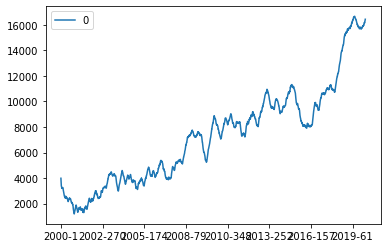

In [33]:
df_to_train[[0]].plot()

In [34]:
df_to_predict = df2.iloc[7305:,:]
df_to_predict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2020-1,16446,14079,16601,17068,14564,13737,14926,13449,10213,15363,14610,13630,10648,17832,19451,12065,11859,13620,11999,15694,14724,12466,10708,12972,13453,14792,12192,17682,14775,14961,9349,13797,13591,13587,12876,16334,15031,11923,12630,14257,...,14813,13398,12058,16052,15467,11443,15284,18350,18292,11221,12512,19001,16055,16309,15164,13284,13609,13844,17972,15587,15929,12007,15791,15601,15844,14018,13557,14774,14579,13548,13127,14758,12243,16128,13219,16240,9749,12206,12349,14096
2020-2,16459,14195,16613,17058,14552,13749,14965,13385,10187,15347,14610,13628,10649,17790,19464,11996,11947,13617,11999,15681,14690,12356,10736,12974,13429,14893,12184,17665,14729,14971,9346,13737,13614,13558,12860,16351,15038,11880,12613,14143,...,14762,13344,12093,16044,15425,11423,15232,18347,18302,11197,12504,19000,16052,16191,15122,13248,13586,13918,17974,15609,15912,11974,15785,15624,15838,13980,13563,14796,14595,13567,13112,14761,12125,16074,13259,16279,9743,12161,12356,14132
2020-3,16457,14284,16622,17018,14552,13757,14933,13323,10170,15291,14604,13640,10649,17730,19576,11929,12042,13684,11976,15669,14738,12256,10765,13028,13455,14960,12171,17684,14711,14977,9353,13691,13658,13518,12915,16342,14985,11822,12594,14045,...,14749,13314,12101,16062,15412,11402,15225,18347,18308,11189,12490,18999,16049,16074,15113,13196,13553,13974,17976,15624,15891,11948,15775,15646,15851,13959,13571,14832,14611,13575,13099,14768,11989,16126,13269,16293,9742,12122,12397,14125
2020-4,16438,14310,16635,16918,14444,13769,14931,13282,10121,15251,14609,13650,10650,17700,19625,11877,12121,13710,11949,15656,14811,12204,10813,13102,13503,15004,12162,17753,14649,14980,9306,13664,13719,13506,12941,16341,14941,11767,12590,13966,...,14691,13286,12080,16117,15394,11362,15176,18344,18316,11189,12443,18995,16055,15975,15103,13167,13505,14018,17977,15668,15869,11926,15793,15684,15926,13961,13591,14845,14609,13590,13053,14777,11893,16181,13276,16296,9770,12082,12445,14139
2020-5,16422,14305,16641,16857,14383,13778,14923,13229,10082,15211,14623,13654,10649,17615,19628,11815,12197,13713,11981,15642,14794,12171,10878,13116,13547,15031,12156,17813,14611,14983,9344,13629,13759,13497,12940,16352,14925,11772,12580,13917,...,14727,13249,12041,16191,15296,11315,15047,18343,18325,11177,12400,18991,16061,15871,15067,13119,13451,13979,17979,15712,15848,11912,15748,15704,15998,13965,13615,14877,14608,13592,12975,14789,11840,16117,13322,16358,9775,12079,12473,14152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-361,16084,18648,22119,19245,20763,16744,18838,13821,18790,18236,15474,17583,12091,20075,20492,16965,18086,16272,16777,17048,18160,19315,13284,18062,19995,18895,19674,18269,15643,17950,19441,18356,16012,17884,20929,19567,14275,16901,17084,12515,...,17572,19298,14941,21035,20652,18104,18982,21760,21674,18901,18235,22493,21267,20300,16082,15146,16810,18093,22311,17504,19566,15978,17642,18125,16813,15184,16806,17147,20451,17194,15238,15406,21501,18767,18039,17307,14094,17059,16431,18583
2025-362,16113,18709,22111,19122,20765,16741,18744,13830,18793,18250,15462,17599,12103,20037,20398,16981,18020,16224,16790,17059,18153,19346,13298,17976,20008,18801,19651,18259,15689,17943,19449,18331,15967,17884,20969,19559,14202,16964,17099,12599,...,17515,19256,14842,21013,20682,18118,18926,21757,21676,18923,18305,22495,21267,20294,16085,15181,16779,18101,22313,17440,19582,15997,17684,18170,16845,15183,16823,17160,20457,17167,15306,15418,21519,18801,17996,17329,14099,17035,16407,18563
2025-3

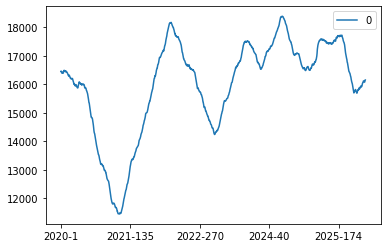

In [35]:
df_to_predict[[0]].plot()

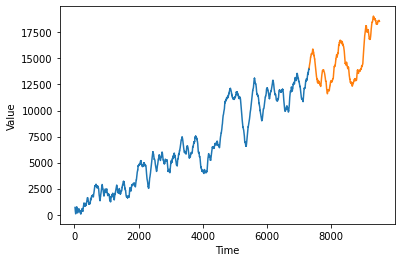

In [36]:
plot_series(time[0:7305],df_to_train.iloc[:,99])
plot_series(time[7305:],df_to_predict.iloc[:,99])


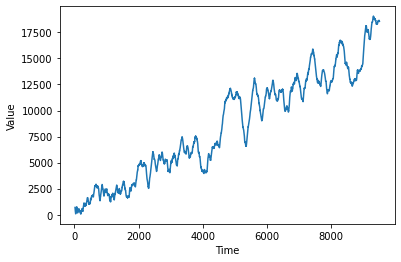

In [37]:
plot_series(time,df2.iloc[:,99])

In [0]:
df_to_train.to_csv("/content/drive/My Drive/Google Earth/new datasets/Traffic_density_day_by_day_2000_to_2019.csv")

In [0]:
df_to_predict.to_csv("/content/drive/My Drive/Google Earth/new datasets/Traffic_density_day_by_day_2020_to_2025.csv")

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
